In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

from analysis import statUtils as su

district_data = pd.read_csv("../../assets/clean/district.csv")
loan_data = pd.read_csv("../../assets/clean/loan_dev.csv")
transaction_data = pd.read_csv("../../assets/clean/trans_dev.csv", dtype=
    {"trans_id": int, "account_id": int, "date": str, "type": str, "operation": str, "amount": float, "balance": float, "k_symbol": str, "bank": str, "account": str}
)

# do correlation analysis on the data
def correlationAnalysis(data, cols):
  # create a correlation matrix using spearman correlation
  corr = data[cols].corr(method="spearman")
  # plot the correlation matrix
  plt.figure(figsize=(10, 10))
  sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')
  plt.title('Correlation between different fearures')
  plt.show()


# Here, we'll proceed to calculate the correlation between variables of each table independently

Account, Card_dev, client and disp tables won't be used since they don't have useful features to relate 

## District

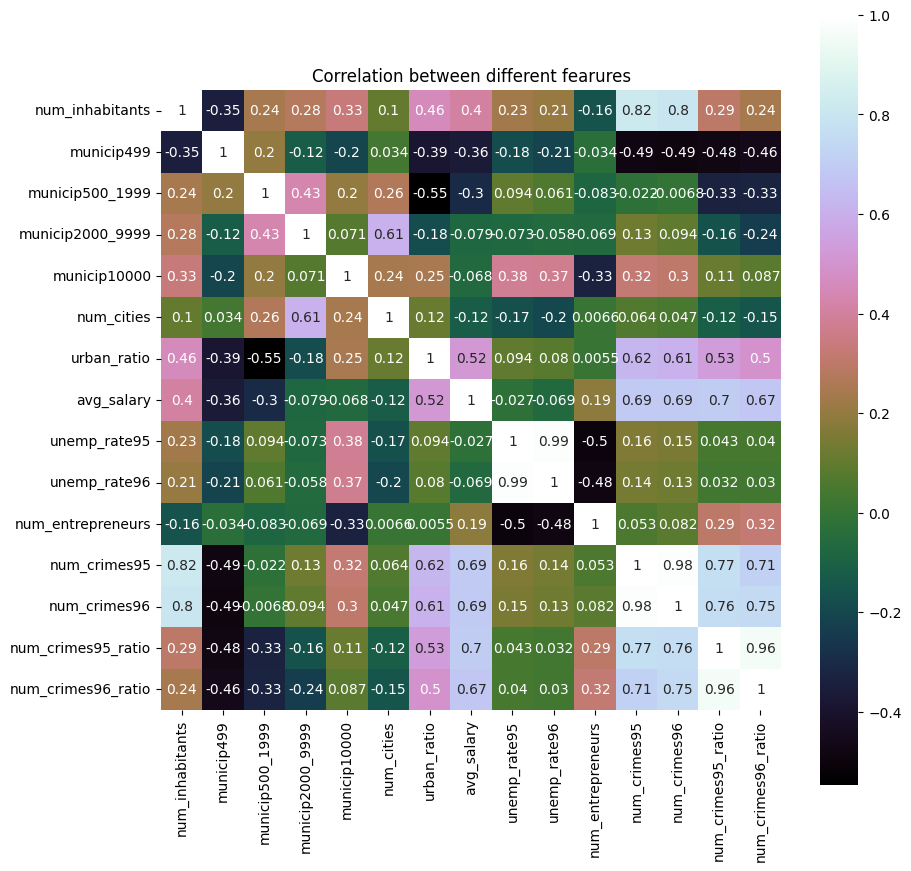

In [2]:
districtCols = ["num_inhabitants", "municip499", "municip500_1999", "municip2000_9999", "municip10000", "num_cities", "urban_ratio", "avg_salary", "unemp_rate95", "unemp_rate96", "num_entrepreneurs", "num_crimes95", "num_crimes96", "num_crimes95_ratio", "num_crimes96_ratio"]

correlationAnalysis(district_data, districtCols)

From here, we can clearly see that there is a big relation between num_crimes95_ration and num_crimes96_ratio.
We see that this correlation also exists with avg_salary feature, so we'll do a statistical test to confirm that correlation.

In [3]:
su.spearman_correlation(district_data, "num_crimes95_ratio", "avg_salary")

correlation:  0.6951909616255203
p:  2.3001756107002063e-12
H0 rejected, so there is a correlation between the two variables


Since the H0 was rejected, the features are correlated and we should discard one of those. To do that, we will analyze which is more 
correlated with the target "paid" and choose that one.

## Loan table

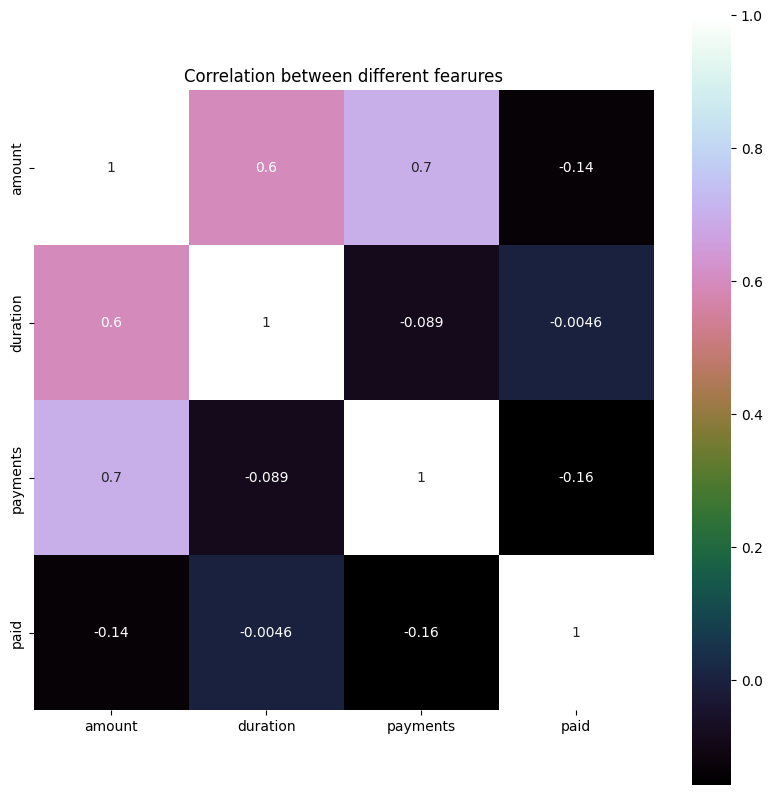

In [4]:
loanCols = ["amount", "duration", "payments", "paid"]

correlationAnalysis(loan_data, loanCols)

As we see, amount, duration and payments are highly correlated, so we should discard some of them.

Since payments has more correlation with paid, we will maintain it.

We will do this on feature Extraction/selection.

## Trans_dev table

We already analyze the columns type and operation on dataAnalysis, and will keep the type column. 
Here, we will plot the correlation between amount and balance and we should discard the rest of the features,
since they dont bring much information and have a lot of missing values (dataAnalysis).

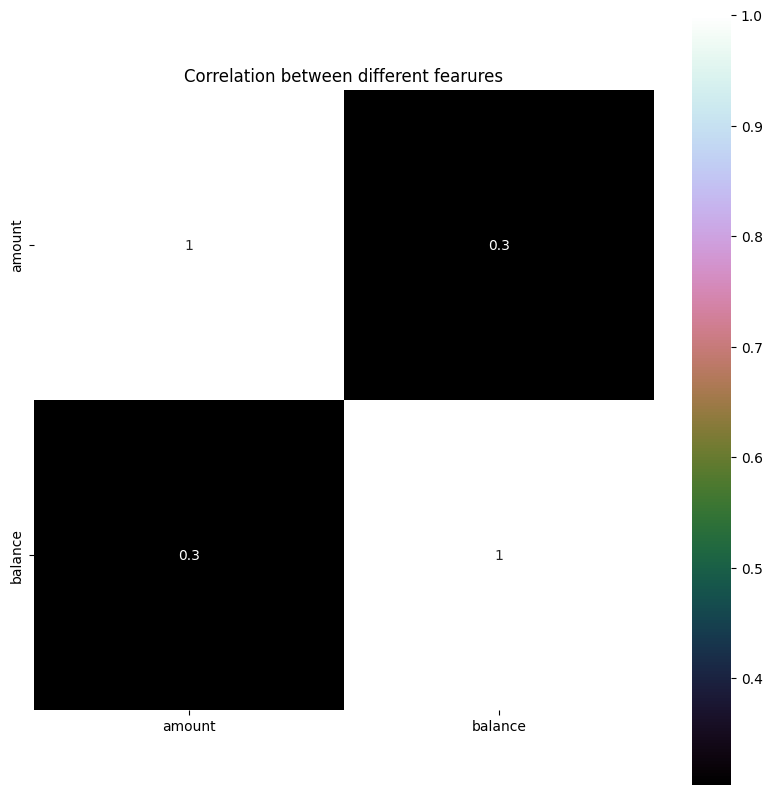

In [5]:
transactionsCols = ["amount", "balance"]

correlationAnalysis(transaction_data, transactionsCols)

These features are not correlated so we can't take any assumption from here.
We will proceed to calculate the correlation with the target in featureExtraction after we have all the columns joined